## Numerical Integration

### Problem 1:

In [96]:
import sympy as sy

def newton_cotes(g, a, b, N, method):
    sum_elem = 0
    
    if method == 'midpoint':
        s = (b - a) / N
        f = lambda i: a + ((2*i + 1)*(b - a)) / (2*N)
        for i in range(N):
            sum_elem += g(f(i))
        return s * sum_elem
    
    if method == 'trapezoid':
        s = (b - a) / (2*N)
        f = lambda i: a + (i*(b - a)) / N
        for i in range(N):
            x = f(i)
            sum_elem += g(x)
        return s * (g(f(0)) + 2*sum_elem + g(f(N)))
    
    if method == 'Simpsons':
        s = (b - a) / (3*(N + 1))
        f = lambda i: a + (i*(b - a) / (2*N))
        sum_elem2 = 0
        for i in range(1,2*N):
            x = f(i)
            if (i % 2) == 1:
                sum_elem2 += g(x)
            else: 
                sum_elem += g(x)
        return s * (g(f(0)) + 4*sum_elem + 2*sum_elem2 + g(f(2*N)))
    
    

In [97]:
x = sy.symbols('x')
g = sy.lambdify(x, 0.1*(x**4) - 1.5*(x**3) + 2*x + 1)

mid = newton_cotes(g, -10, 10, 3, 'midpoint')
trap = newton_cotes(g, -10, 10, 3, 'trapezoid')
simps = newton_cotes(g, -10, 10, 3, 'Simpsons')

print("True value: 4,373.33",
      "\nMidpoint method:", mid,
      "\nTrapezoid method:", trap,
      "\nSimpsons method:", simps)


True value: 4,373.33 
Midpoint method: 2653.7448559670765 
Trapezoid method: 23391.27572016461 
Simpsons method: 4841.481481481481


### Problem 2:

In [107]:
import scipy as sp
import numpy as np
from scipy.stats import norm

def approx_normal(mu, sigma, N, k, z=None):
    w = np.zeros(N)
    z = np.linspace(-k, k, N)
        
    for i in range(N):
        if i == 0:
            arg = (z[i] + z[i+1]) / 2
            w[i] = sp.stats.norm.cdf(arg, mu, sigma)
        elif i == N-1:
            arg = (z[i-1] + z[i]) / 2
            w[i] = 1 - sp.stats.norm.cdf(arg, mu, sigma)
        else:
            zmin = (z[i-1] + z[i]) / 2
            zmax = (z[i] + z[i + 1]) / 2
            w[i] = sp.stats.norm.cdf(zmax) - sp.stats.norm.cdf(zmin)
    
    return z, w

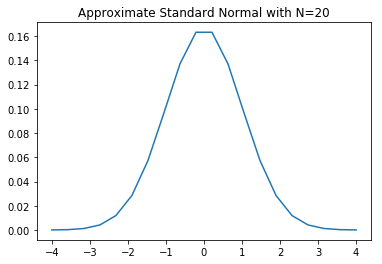

In [108]:
import matplotlib.pyplot as plt

nodes, weights = approx_normal(0, 1, 20, 4)
plt.plot(nodes, weights)
plt.title("Approximate Standard Normal with N=20")
plt.show()

### Problem 3:

In [116]:
def approx_lnorm(mu, sigma, N, k):
    nodes, weights = approx_normal(mu, sigma, N, k)
    
    return np.exp(nodes), weights

In [121]:
nodes, weights = approx_lnorm(0, 1, 11, 4)

### Problem 4:

### Problem 5:

In [130]:
import math

def quad_approx(x):
    x_quad = np.array([0, math.sqrt(15)/5, -math.sqrt(15)/5])
    w = np.array([8/9, 5/9, 5/9])
    
    g = lambda x: 0.1*(x**4) - 1.5*(x**3) + 2*x + 1
    
    result = 0
    for i in range(3):
        result += w[i]*g(x_quad[i])
    
    return result

### Problem 6:

In [135]:
def prob_6():
    f = lambda x: 0.1*(x**4) - 1.5*(x**3) + 2*x + 1
    
    result = sp.integrate.quad(f, -10, 10)
    print(result)

In [136]:
prob_6()

(4020.0, 8.107255062006482e-11)


### Problem 7:

In [214]:
def g1(x1,y1):
    if ((x1**2) + (y1**2) <= 1):
        return 1
    else:
        return 0

omega = np.array([-1,1])
def montecarlo(g, omega, N):
    a = omega[0]
    b = omega[1]
    
    xy = np.random.rand(N,2)*(b-a) - 1
    summed = 0
    for i in range(N):
        summed = summed + g(xy[i,0], xy[i,1])
        
    pi = (4/N)*summed
    
    return pi

n = 1000
delta = 5
while (delta != 0):
    estimate = montecarlo(g1, omega, n)
    delta = round(estimate, 5) - 3.1415
    n = n + 1
print(estimate)
print("Smallest number of draws: ", n)

KeyboardInterrupt: 

### Problem 8:

In [211]:
from sympy import sieve

#todo: fix me

def prob_8(n, d, method):
    p_n = sieve[n]
    
    result = np.zeros(d)
    
    if method == 'Weyl':
        for i in range(d):
            result[i] = n*sieve[i]**(0.5)
        return result % 1
    
    if method == 'Haber':
        for i in range(d):
            result[i] = (sieve[i]**0.5) * (n*(n+1)) / 2
        return result % 1
    
    if method == 'Niederreiter':
        for i in range(d):
            result[i] = n* (2**(1 / (n + 1)))
        return result % 1
    
    '''
    if method == 'Baker':
        for i in range(d):
    '''
        
    

In [213]:
prob_8(8, 19, 'Weyl')

array([ 0.47184906,  0.3137085 ,  0.85640646,  0.88854382,  0.16601049,
        0.53299832,  0.8444102 ,  0.984845  ,  0.87119155,  0.36665219,
        0.08131846,  0.5421149 ,  0.66210024,  0.2249939 ,  0.45950819,
        0.8452368 ,  0.24087911,  0.44916598,  0.48199741])

### Problem 9:

In [ ]:
def approx_pi_mc(g, omega, N):
    